In [1]:
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from time import time

# load data 
start = time()
network_data = pd.read_excel('Amazon_network.xlsx')
print('ended reading file 1',time()-start)

start = time()
network_data1 = pd.read_excel('Amazon_network1.xlsx')
print('ended reading file 2',time()-start)

ended reading file 1 31.615310430526733
ended reading file 2 31.03056764602661


In [2]:
network_data1.shape

(1048575, 3)

In [3]:
data = pd.concat([network_data,network_data1])
data = data.sort_values('FromNodeId')
print(data.shape[0])
data

2097140


,FromNodeId,ToNodeId,Time
4,0,5,May
2,0,3,May
3,0,4,May
5,0,6,May
6,0,7,May
...,...,...,...
1048568,112950,107617,May
1048567,112950,98106,May
1048566,112950,80755,May
1048569,112950,107618,May


In [4]:
data = data[~(data == 0).any(axis=1)]
data

,FromNodeId,ToNodeId,Time
13,1,4,May
14,1,5,May
15,1,7,May
16,1,44,May
17,1,56,May
...,...,...,...
1048568,112950,107617,May
1048567,112950,98106,May
1048566,112950,80755,May
1048569,112950,107618,May


In [5]:
# load the network data shuffled and unshuffled
data_shuffle = data.head(50000).reset_index()
data_shuffle

,index,FromNodeId,ToNodeId,Time
0,13,1,4,May
1,14,1,5,May
2,15,1,7,May
3,16,1,44,May
4,17,1,56,May
...,...,...,...,...
49995,25039,2542,4284,June
49996,25043,2543,386,June
49997,25045,2543,15414,June
49998,25040,2543,332,June


In [6]:
# load the meta data
meta_data = open('amazon-meta.txt','r',encoding='utf-8').readlines()
meta_data = meta_data[7:]
meta_data[:5]

['Id:   1\n',
 'ASIN: 0827229534\n',
 '  title: Patterns of Preaching: A Sermon Sampler\n',
 '  group: Book\n',
 '  salesrank: 396585\n']

In [7]:
# parse the meta-data
lst = []
t = 0
for i in tqdm(range(len(meta_data)-1)):
    if meta_data[i].startswith('Id:'):
        t = i
    if meta_data[i] == '\n':
        lst.append(meta_data[t:i])

100%|█████████████████████████████████████████████████████████████████| 15010566/15010566 [00:05<00:00, 2626848.44it/s]


In [8]:
lst[:1]

[['Id:   1\n',
  'ASIN: 0827229534\n',
  '  title: Patterns of Preaching: A Sermon Sampler\n',
  '  group: Book\n',
  '  salesrank: 396585\n',
  '  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X\n',
  '  categories: 2\n',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]\n',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]\n',
  '  reviews: total: 2  downloaded: 2  avg rating: 5\n',
  '    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9\n',
  '    2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5\n']]

In [9]:
# a function to separate the features from the row as string
def bring_value(ft, num):
    return lst[int(row[ft])][num].split(': ')[-1].rstrip()

# combine the two datasets
for i, row in tqdm(data_shuffle.iterrows()):
    # shuffled data
    try:
        data_shuffle.loc[i,'from_group'] = bring_value('FromNodeId',3)
        data_shuffle.loc[i,'from_salesrank'] = bring_value('FromNodeId',4)
        data_shuffle.loc[i,'from_similarnumber'] = bring_value('FromNodeId',5)[0]

        data_shuffle.loc[i,'to_group'] = bring_value('ToNodeId',3) 
        data_shuffle.loc[i,'to_salesrank'] = bring_value('ToNodeId',4)
        data_shuffle.loc[i,'to_similarnumber'] = bring_value('ToNodeId',5)[0]
    except:
        if lst[int(row['FromNodeId'])][-1] == '  discontinued product\n': 
            data_shuffle.loc[i,'from_group'] = 'discontinued product'
            data_shuffle.loc[i,'from_salesrank'] = 'discontinued product'
            data_shuffle.loc[i,'from_similarnumber'] = 'discontinued product'
        elif lst[int(row['ToNodeId'])][-1] == '  discontinued product\n': 
            data_shuffle.loc[i,'to_group'] = 'discontinued product'
            data_shuffle.loc[i,'to_salesrank'] = 'discontinued product'
            data_shuffle.loc[i,'to_similarnumber'] = 'discontinued product'
        else:
            print('another problem i found')
            print(row)

50000it [01:42, 489.95it/s]


In [10]:
#check and remove missing data
print(data_shuffle.isna().sum())
data_shuffle.dropna(axis=0,inplace=True)

index                   0
FromNodeId              0
ToNodeId                0
Time                    0
from_group              0
from_salesrank          0
from_similarnumber      0
to_group              400
to_salesrank          400
to_similarnumber      400
dtype: int64


In [11]:
print(data_shuffle.isna().sum())
print(data_shuffle.shape)

index                 0
FromNodeId            0
ToNodeId              0
Time                  0
from_group            0
from_salesrank        0
from_similarnumber    0
to_group              0
to_salesrank          0
to_similarnumber      0
dtype: int64
(49600, 10)


In [12]:
# remove products that are discontinued....
data_shuffle = data_shuffle[~(data_shuffle == 'discontinued product').any(axis=1)]
print(data_shuffle.shape)
print(data_shuffle.dtypes)
data_shuffle

(49247, 10)
index                  int64
FromNodeId             int64
ToNodeId               int64
Time                  object
from_group            object
from_salesrank        object
from_similarnumber    object
to_group              object
to_salesrank          object
to_similarnumber      object
dtype: object


,index,FromNodeId,ToNodeId,Time,from_group,from_salesrank,from_similarnumber,to_group,to_salesrank,to_similarnumber
0,13,1,4,May,Book,168596,5,Book,455160,5
1,14,1,5,May,Book,168596,5,Book,188784,5
2,15,1,7,May,Book,168596,5,Book,277409,5
3,16,1,44,May,Book,168596,5,Book,48408,5
4,17,1,56,May,Book,168596,5,Book,1501773,0
...,...,...,...,...,...,...,...,...,...,...
49995,25039,2542,4284,June,Book,684425,2,DVD,18575,5
49996,25043,2543,386,June,Book,324657,4,Book,658807,0
49997,25045,2543,15414,June,Book,324657,4,Music,287315,5
49998,25040,2543,332,June,Book,324657,4,Book,117950,2


In [13]:
data_shuffle.from_salesrank[data_shuffle.from_salesrank.astype(int)>0].sort_values(ascending=True)#,data_shuffle.from_salesrank.max()

5215     100261
5216     100261
5232     100261
5231     100261
5230     100261
          ...  
47874    999813
47872    999813
47871    999813
47884    999813
47873    999813
Name: from_salesrank, Length: 49187, dtype: object

In [14]:
data_shuffle.loc[:,'from_similarnumber'] = data_shuffle.from_similarnumber.astype(int)
data_shuffle.loc[:,'to_similarnumber'] = data_shuffle.to_similarnumber.astype(int)
data_shuffle.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


index                  int64
FromNodeId             int64
ToNodeId               int64
Time                  object
from_group            object
from_salesrank        object
from_similarnumber     int32
to_group              object
to_salesrank          object
to_similarnumber       int32
dtype: object

In [15]:
data_shuffle.loc[:,'from_salesrank'] = data_shuffle['from_salesrank'].rank(pct=True)
data_shuffle.loc[:,'to_salesrank'] = data_shuffle['to_salesrank'].rank(pct=True)
data_shuffle

,index,FromNodeId,ToNodeId,Time,from_group,from_salesrank,from_similarnumber,to_group,to_salesrank,to_similarnumber
0,13,1,4,May,Book,0.221912,5,Book,0.612443,5
1,14,1,5,May,Book,0.221912,5,Book,0.269681,5
2,15,1,7,May,Book,0.221912,5,Book,0.415315,5
3,16,1,44,May,Book,0.221912,5,Book,0.646963,5
4,17,1,56,May,Book,0.221912,5,Book,0.184854,0
...,...,...,...,...,...,...,...,...,...,...
49995,25039,2542,4284,June,Book,0.829015,2,DVD,0.264828,5
49996,25043,2543,386,June,Book,0.479065,4,Book,0.815867,0
49997,25045,2543,15414,June,Book,0.479065,4,Music,0.427965,5
49998,25040,2543,332,June,Book,0.479065,4,Book,0.082259,2


In [16]:
data_shuffle.corr()

,index,FromNodeId,ToNodeId,from_salesrank,from_similarnumber,to_salesrank,to_similarnumber
index,1.000000,0.999993,0.166160,0.009960,-0.010644,-0.012727,-0.002612
FromNodeId,0.999993,1.000000,0.165995,0.010029,-0.010668,-0.012719,-0.002567
ToNodeId,0.166160,0.165995,1.000000,0.004635,0.006172,-0.003996,-0.013586
from_salesrank,0.009960,0.010029,0.004635,1.000000,0.070843,0.004825,-0.003552
from_similarnumber,-0.010644,-0.010668,0.006172,0.070843,1.000000,-0.000377,-0.007531
to_salesrank,-0.012727,-0.012719,-0.003996,0.004825,-0.000377,1.000000,0.074827
to_similarnumber,-0.002612,-0.002567,-0.013586,-0.003552,-0.007531,0.074827,1.000000


In [17]:
# a function to display the categorial columns distributions
def plot_dist(data,col_name):
    data[col_name].value_counts().sort_index().plot(kind='bar') 
    plt.title(col_name+' value counts dist')
    plt.xlabel(col_name)
    plt.ylabel('Number of flights')
    plt.show()

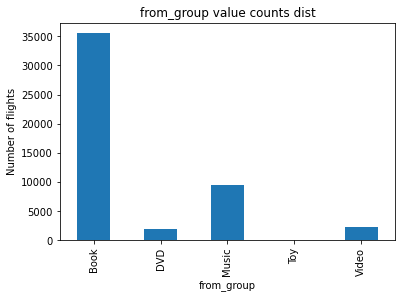

In [18]:
plot_dist(data_shuffle,'from_group') 

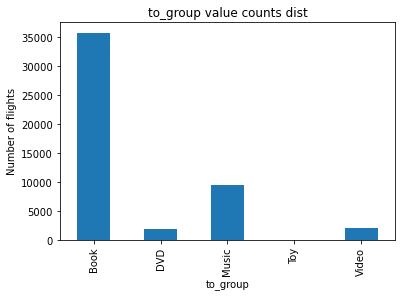

In [19]:
plot_dist(data_shuffle,'to_group') 

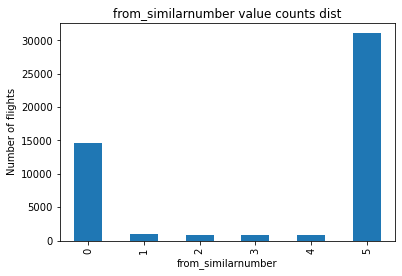

In [20]:
plot_dist(data_shuffle,'from_similarnumber') 

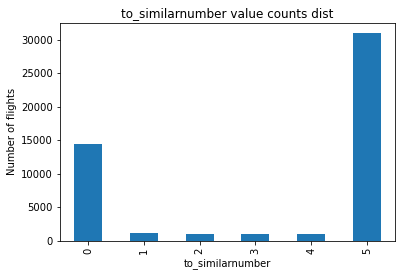

In [21]:
plot_dist(data_shuffle,'to_similarnumber') 

In [22]:
# calculate the rareness of the groups
def return_rareness(str1,rareness):
    return (rareness)[str1]

def get_rareness_of_column(data,c):
    t = data[c].value_counts() / data.shape[0]
    return 1-t

from_group_rareness_shuffled = get_rareness_of_column(data_shuffle,'from_group')
to_group_rareness_shuffled = get_rareness_of_column(data_shuffle,'to_group')

print(from_group_rareness_shuffled,'\n')
print(to_group_rareness_shuffled)

Book     0.278210
Music    0.806486
Video    0.954901
DVD      0.960810
Toy      0.999594
Name: from_group, dtype: float64 

Book     0.273864
Music    0.808618
Video    0.957358
DVD      0.960586
Toy      0.999574
Name: to_group, dtype: float64


In [23]:
# add the rareness to the data by the groups
data_shuffle.loc[:,'from_group_rareness'] = data_shuffle.loc[:,'from_group'].apply(lambda x: return_rareness(x,from_group_rareness_shuffled))
data_shuffle.loc[:,'to_group_rareness'] = data_shuffle.loc[:,'to_group'].apply(lambda x: return_rareness(x,to_group_rareness_shuffled))
data_shuffle

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,index,FromNodeId,ToNodeId,Time,from_group,from_salesrank,from_similarnumber,to_group,to_salesrank,to_similarnumber,from_group_rareness,to_group_rareness
0,13,1,4,May,Book,0.221912,5,Book,0.612443,5,0.27821,0.273864
1,14,1,5,May,Book,0.221912,5,Book,0.269681,5,0.27821,0.273864
2,15,1,7,May,Book,0.221912,5,Book,0.415315,5,0.27821,0.273864
3,16,1,44,May,Book,0.221912,5,Book,0.646963,5,0.27821,0.273864
4,17,1,56,May,Book,0.221912,5,Book,0.184854,0,0.27821,0.273864
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25039,2542,4284,June,Book,0.829015,2,DVD,0.264828,5,0.27821,0.960586
49996,25043,2543,386,June,Book,0.479065,4,Book,0.815867,0,0.27821,0.273864
49997,25045,2543,15414,June,Book,0.479065,4,Music,0.427965,5,0.27821,0.808618
49998,25040,2543,332,June,Book,0.479065,4,Book,0.082259,2,0.27821,0.273864


In [24]:
data_shuffle[['FromNodeId','ToNodeId','from_group','from_group_rareness']].sample(n=5)

,FromNodeId,ToNodeId,from_group,from_group_rareness
37499,1902,11394,Book,0.278210
23166,1172,1177,Music,0.806486
13466,681,595,Book,0.278210
7797,393,315,Book,0.278210
39946,2027,5320,Book,0.278210


In [24]:
from_similarnumber_rareness_shuffle = get_rareness_of_column(data_shuffle,'from_similarnumber')
to_similarnumber_rareness_shuffle = get_rareness_of_column(data_shuffle,'to_similarnumber')

print(from_similarnumber_rareness_shuffle,'\n')
print(to_similarnumber_rareness_shuffle)

5    0.369444
0    0.703332
1    0.980100
4    0.981908
2    0.982212
3    0.983004
Name: from_similarnumber, dtype: float64 

5    0.371779
0    0.706114
1    0.978699
3    0.980527
2    0.981278
4    0.981603
Name: to_similarnumber, dtype: float64


In [25]:
data_shuffle.loc[:,'from_similarnumber_rareness'] = data_shuffle.loc[:,'from_similarnumber'].apply(lambda x: return_rareness(x,from_similarnumber_rareness_shuffle))
data_shuffle.loc[:,'to_similarnumber_rareness'] = data_shuffle.loc[:,'to_similarnumber'].apply(lambda x: return_rareness(x,to_similarnumber_rareness_shuffle))
data_shuffle

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,index,FromNodeId,ToNodeId,Time,from_group,from_salesrank,from_similarnumber,to_group,to_salesrank,to_similarnumber,from_group_rareness,to_group_rareness,from_similarnumber_rareness,to_similarnumber_rareness
0,13,1,4,May,Book,0.221912,5,Book,0.612443,5,0.27821,0.273864,0.369444,0.371779
1,14,1,5,May,Book,0.221912,5,Book,0.269681,5,0.27821,0.273864,0.369444,0.371779
2,15,1,7,May,Book,0.221912,5,Book,0.415315,5,0.27821,0.273864,0.369444,0.371779
3,16,1,44,May,Book,0.221912,5,Book,0.646963,5,0.27821,0.273864,0.369444,0.371779
4,17,1,56,May,Book,0.221912,5,Book,0.184854,0,0.27821,0.273864,0.369444,0.706114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25039,2542,4284,June,Book,0.829015,2,DVD,0.264828,5,0.27821,0.960586,0.982212,0.371779
49996,25043,2543,386,June,Book,0.479065,4,Book,0.815867,0,0.27821,0.273864,0.981908,0.706114
49997,25045,2543,15414,June,Book,0.479065,4,Music,0.427965,5,0.27821,0.808618,0.981908,0.371779
49998,25040,2543,332,June,Book,0.479065,4,Book,0.082259,2,0.27821,0.273864,0.981908,0.981278


In [26]:
data_shuffle

,index,FromNodeId,ToNodeId,Time,from_group,from_salesrank,from_similarnumber,to_group,to_salesrank,to_similarnumber,from_group_rareness,to_group_rareness,from_similarnumber_rareness,to_similarnumber_rareness
0,13,1,4,May,Book,0.221912,5,Book,0.612443,5,0.27821,0.273864,0.369444,0.371779
1,14,1,5,May,Book,0.221912,5,Book,0.269681,5,0.27821,0.273864,0.369444,0.371779
2,15,1,7,May,Book,0.221912,5,Book,0.415315,5,0.27821,0.273864,0.369444,0.371779
3,16,1,44,May,Book,0.221912,5,Book,0.646963,5,0.27821,0.273864,0.369444,0.371779
4,17,1,56,May,Book,0.221912,5,Book,0.184854,0,0.27821,0.273864,0.369444,0.706114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25039,2542,4284,June,Book,0.829015,2,DVD,0.264828,5,0.27821,0.960586,0.982212,0.371779
49996,25043,2543,386,June,Book,0.479065,4,Book,0.815867,0,0.27821,0.273864,0.981908,0.706114
49997,25045,2543,15414,June,Book,0.479065,4,Music,0.427965,5,0.27821,0.808618,0.981908,0.371779
49998,25040,2543,332,June,Book,0.479065,4,Book,0.082259,2,0.27821,0.273864,0.981908,0.981278


In [27]:
# set strength values
data_shuffle['group_strength'] = 0
data_shuffle['similar_strength'] = 0

# compute strength based on dyad rareness
for i, row in tqdm(data_shuffle.iterrows()):
    
    if row['to_group'] != row['from_group']:
        # if the two products are not under the same group they are less likely to be bought together ----> higher strength score
        data_shuffle.loc[i,'group_strength'] = (row['from_group_rareness']+row['to_group_rareness'])*10
        
        tot_similar = row['from_similarnumber'] + row['to_similarnumber']
        # if the products had a lot of substitutes and still chose each other ----> higher score based on number of substitutes
        if tot_similar>=10:
            data_shuffle.loc[i,'similar_strength'] = (row['from_similarnumber_rareness']+row['to_similarnumber_rareness'])*5

        # the lesser amount of substitutes the lesser the score but still consider rarity
        elif tot_similar<10 and tot_similar>=5:
            data_shuffle.loc[i,'similar_strength'] = (row['from_similarnumber_rareness']+row['to_similarnumber_rareness'])*4

        elif tot_similar<5 and tot_similar>=3:
            data_shuffle.loc[i,'similar_strength'] = (row['from_similarnumber_rareness']+row['to_similarnumber_rareness'])*3

        else:
            data_shuffle.loc[i,'similar_strength'] = (row['from_similarnumber_rareness']+row['to_similarnumber_rareness'])*2
        
        data_shuffle.loc[i,'rank_strength'] = (row['from_salesrank']+row['to_salesrank'])*10
        
    else:
        # if the two products are under the same group they are more likely to be bought together ----> lower strength score
        data_shuffle.loc[i,'group_strength'] = (row['from_group_rareness']+row['to_group_rareness'])*5
        
        tot_similar = row['from_similarnumber'] + row['to_similarnumber']
        # if the products had a lot of substitutes and still chose each other ----> higher score based on number of substitutes
        if tot_similar>=10:
            data_shuffle.loc[i,'similar_strength'] = (row['from_similarnumber_rareness']+row['to_similarnumber_rareness'])*4*2

        # the lesser amount of substitutes the lesser the score but still consider rarity
        elif tot_similar<10 and tot_similar>=5:
            data_shuffle.loc[i,'similar_strength'] = (row['from_similarnumber_rareness']+row['to_similarnumber_rareness'])*3*2

        elif tot_similar<5 and tot_similar>=3:
            data_shuffle.loc[i,'similar_strength'] = (row['from_similarnumber_rareness']+row['to_similarnumber_rareness'])*2*2

        else:
            data_shuffle.loc[i,'similar_strength'] = (row['from_similarnumber_rareness']+row['to_similarnumber_rareness'])*2
    
        data_shuffle.loc[i,'rank_strength'] = (row['from_salesrank']+row['to_salesrank'])*5

<ipython-input-27-8054633a2f44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shuffle['group_strength'] = 0
<ipython-input-27-8054633a2f44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shuffle['similar_strength'] = 0
0it [00:00, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [28]:
data_shuffle.group_strength.value_counts().sort_index()

2.760371     26165
8.075517      2081
9.561293       103
9.606981       150
10.803501     6656
10.868276     6551
12.287652     1584
12.346742     1340
12.355676     1511
12.387963     1302
12.734583       15
12.777834       17
17.635186      437
17.638435      399
17.670721      392
17.694276      353
18.060593        2
18.082117        3
19.154872       96
19.181676       86
19.544744        1
19.569517        1
19.601803        1
19.603834        1
Name: group_strength, dtype: int64

In [29]:
data_shuffle.similar_strength.value_counts().sort_index()

2.818893     4220
3.364063      305
3.369220      284
3.372429      289
3.376652      266
             ... 
11.781063      11
11.781185       8
11.782890       7
11.785693       8
11.787642       7
Name: similar_strength, Length: 65, dtype: int64

In [30]:
data_shuffle['strength'] = data_shuffle['similar_strength']+data_shuffle['group_strength']+data_shuffle['rank_strength']
result_shuffle = data_shuffle[['FromNodeId','ToNodeId','Time','from_group','to_group','from_similarnumber','to_similarnumber','strength']]

<ipython-input-30-440d847ba0a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shuffle['strength'] = data_shuffle['similar_strength']+data_shuffle['group_strength']+data_shuffle['rank_strength']


In [31]:
result_shuffle.loc[result_shuffle.Time=='June','Time'] = '2003-06'
result_shuffle.loc[result_shuffle.Time=='May','Time'] = '2003-05'
result_shuffle

,FromNodeId,ToNodeId,Time,from_group,to_group,from_similarnumber,to_similarnumber,strength
0,1,4,2003-05,Book,Book,5,5,12.861931
1,1,5,2003-05,Book,Book,5,5,11.148121
2,1,7,2003-05,Book,Book,5,5,11.876287
3,1,44,2003-05,Book,Book,5,5,13.034530
4,1,56,2003-05,Book,Book,5,0,11.247548
...,...,...,...,...,...,...,...,...
49995,2542,4284,2003-06,Book,DVD,2,5,28.742360
49996,2543,386,2003-06,Book,Book,4,0,15.987116
49997,2543,15414,2003-06,Book,Music,4,5,25.353321
49998,2543,332,2003-06,Book,Book,4,2,17.346102


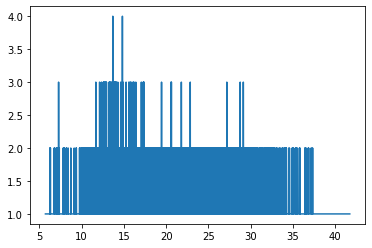

In [32]:
result_shuffle.strength.value_counts().sort_index().plot()

In [34]:
result_shuffle.strength.describe()

count    49247.000000
mean        19.120268
std          6.738336
min          5.709272
25%         13.792383
50%         17.186153
75%         24.589873
max         41.742177
Name: strength, dtype: float64

In [39]:
results = result_shuffle.sort_values('FromNodeId').head(2000)

In [40]:
results

,FromNodeId,ToNodeId,Time,from_group,to_group,from_similarnumber,to_similarnumber,strength
0,1,4,2003-05,Book,Book,5,5,12.861931
17,1,3943,2003-06,Book,Book,5,5,14.199271
16,1,235,2003-06,Book,Music,5,0,21.524296
15,1,234,2003-06,Book,Book,5,5,13.333076
14,1,233,2003-06,Book,Music,5,0,20.343310
...,...,...,...,...,...,...,...,...
1983,102,108,2003-05,Book,Book,5,4,16.601925
1988,102,103,2003-06,Book,Book,5,5,14.878906
1989,102,1547,2003-06,Book,Music,5,5,20.009442
1990,102,106,2003-05,Book,Book,5,5,14.008396


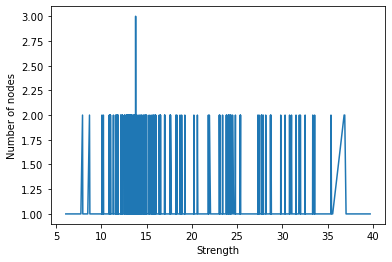

In [41]:
results.strength.value_counts().sort_index().plot()
plt.xlabel('Strength')
plt.ylabel('Number of nodes')
plt.show()

In [42]:
writer = pd.ExcelWriter('Omer_great_idea.xlsx')
# write dataframe to excel
results.to_excel(writer,index=False)
# save the excel
writer.save()


In [47]:
results.Time.value_counts()

2003-06    1001
2003-05     999
Name: Time, dtype: int64

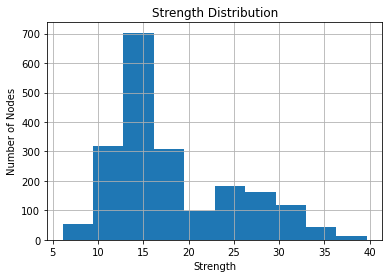

In [43]:
results.strength.hist()
plt.title('Strength Distribution')
plt.xlabel('Strength')
plt.ylabel('Number of Nodes')
plt.show()

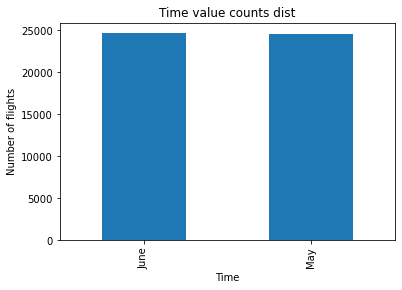

In [39]:
plot_dist(data_shuffle,'Time')

In [40]:
import numpy 
import pandas
from  matplotlib import pyplot
import seaborn

fg = seaborn.FacetGrid(data=data, hue='from_group', hue_order=data.from_group.unique(),size=4,aspect=2)
fg.map(pyplot.scatter, 'from_salesrank', 'to_salesrank').add_legend()

AttributeError: 'DataFrame' object has no attribute 'from_group'

In [ ]:
# n - number of unique elements (by product ids)
n = len(set(data.FromNodeId.to_list()+data.ToNodeId.to_list()))

In [ ]:
# set relationship strength
s = """data.loc[i,'strength'] = 0

data.loc[i,'strength'] = 1

if data.loc[i,'from_group'] == data.loc[i,'to_group']:
    data.loc[i,'strength'] += 1
else:
    data.loc[i,'strength'] += 4

if data.loc[i,'from_similarnumber'] == 5 and data.loc[i,'to_similarnumber']==5:
    data.loc[i,'strength'] += 2"""



In [ ]:
#id title group categories reviews
#products = {j[1]:{'id':j[0],'title':j[2] for j in i} for i in lst}
#products = {i[1].split(': ')[-1].rstrip():{'id':i[0].split(': ')[-1].strip(), 'title':i[2].split(': ')[-1].strip(), 'group':i[3].split(': ')[-1].strip()} for i in lst if i[-1]!='  discontinued product\n'}

#countttt= 0
s = """for i in tqdm(lst):
    for j in range(len(i)):
        if i[j].startswith('  reviews:'):
            review_index = j
    reviews = i[review_index+1:]
    c = 0 
    for review in reviews:
        products[i[1].split(': ')[-1].rstrip()]['review'+str(c)] = review
        c+=1
    countttt+=1
    if countttt==1999:
        break"""

In [ ]:
#df = pd.DataFrame.from_dict(products, orient='index')

In [ ]:
#df = df.head(2000)

In [ ]:
#df